In [14]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import fastbook

fastbook.setup_book()


In [16]:
import torch

gpu = torch.device("mps")
cpu = torch.device("cpu")
device = cpu


In [17]:
from load_mnist_data import load_mnist_data

mnist_path = load_mnist_data()


MNIST data downloaded to /Users/david/.fastai/data/mnist_png


#### Peek into the images before turning them into tensors

In [18]:
from PIL import Image
from load_mnist_data import DataSplit, get_digit_file_paths

im4 = Image.open(get_digit_file_paths(mnist_path, 4, DataSplit.TRAINING)[0])
print(f"Image shape is {im4.shape}")
im4


Image shape is (28, 28)


In [19]:
from PIL import Image
from load_mnist_data import DataSplit, get_digit_file_paths

im4 = Image.open(get_digit_file_paths(mnist_path, 4, DataSplit.TRAINING)[0])
print(f"Image shape is {im4.shape}")
im4


Image shape is (28, 28)


#### Images as tensors

<Axes: >

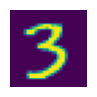

In [20]:
from fastai.torch_core import show_image
from load_mnist_data import get_digit_tensors

show_image(get_digit_tensors(mnist_path, 3, DataSplit.TRAINING, device)[1])


### Stacking tensor images

## Test utils

In [21]:
from load_mnist_data import IMAGE_SHAPE, stack_image_tensors


# | test
def test_stacked_threes():
    stacked_training_threes = stack_image_tensors(
        get_digit_tensors(mnist_path, 3, DataSplit.TRAINING, device)
    )
    # A stacked tensor of threes is rank-3 with ~6k images, each of which is 28 x 28 pixels.
    assert stacked_training_threes.shape == (6131,) + IMAGE_SHAPE


<Axes: >

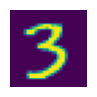

In [22]:
test_stacked_threes()
show_image(
    stack_image_tensors(get_digit_tensors(mnist_path, 3, DataSplit.TRAINING, device))[1]
)
